<h1> It's Lit. An Extensive Study Of Young People </h1>
<h2> <strong> Authors: </strong> <h2>
<ul class="task-list">
<li>Jessica Tsoi</li>
<li>Matthew Lee</li>
<li>Benjamin Mok</li>
<li>Eugene Hong</li>
</ul>

Lets start by importing some of the things we need.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')

<strong> Note: </strong> We will be using matplotlib version 1.5.3

In [95]:
import matplotlib
matplotlib.__version__

'1.5.3'

Our dataset comes from the following: https://www.kaggle.com/miroslavsabo/young-people-survey

We will import the CSV dataset into a pandas Dataframe. We will call it, y_data.

In [96]:
y_data = pd.read_csv('responses.csv')
y_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


Lets take a look at the size of the dataset.

In [97]:
print y_data.shape
print y_data.Music.unique()

(1010, 150)
[  5.   4.   1.   3.   2.  nan]


We note that the data's numerical response are 1 to 5, representing how much they agree on a particular statement. 1 being strongly disagree to 5 being strong agree. We will set a list called onefive that states these answers for our future graphical usage.

In [98]:
onefive = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

<h1> Health Analysis</h1>

Here we will analysis on youngster's health. For this section, we will be working extensive with the following columns:

<ul class="task-list">
<li>I live a very healthy lifestyle. - 'Healthy eating'</li>
<li>Smoking habits - 'Smoking'</li>
<li>Drinking - 'Alcohol'</li>
<li>I worry about my health - 'Health'</li>
<li>I will happily pay more money for good, quality or healthy food. - 'Spending on healthy eating'</li>
<li>Sport and leisure activities - 'Passive sport'</li>
<li>Sport at competitive level - 'Active sport'</li>
<li>Adrenaline sports - 'Adrenaline sports'</li>
</ul>

First, we will subset these columns.

In [99]:
health_an = y_data[['Healthy eating', 'Health', 'Smoking', 'Alcohol', 'Spending on healthy eating', 'Passive sport', 'Active sport', 'Adrenaline sports']]

We are going to convert the smoking and alcohol responses to numerical values. 0 being 'never' and 5 being 'a lot'
First, lets take a look at the unique responses of the 'Smoking' and 'Alcohol' section.

In [100]:
smoking_id = y_data['Smoking'].unique()
alc_id = y_data['Alcohol'].unique()
print smoking_id, '\n', alc_id

['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan] 
['drink a lot' 'social drinker' 'never' nan]


In [101]:
life_dict = {'never smoked': 5, 'tried smoking': 4, 'former smoker': 2, 'current smoker': 0,'never': 5, 'social drinker': 3, 'drink a lot': 0}

Using the dictionary above, we will convert the smoking and alcohol into numeric and add these two values together. We will iterate through the y_data by rows, and then add add a column, 'Life Health', to indicate the score we give them for "How healthy they are" according to their smoking and drinking habits.

In [102]:
for index, row in y_data.iterrows():
    try:
        val = life_dict[row['Alcohol']] + life_dict[row['Smoking']]
        health_an.loc[index,'Life health'] = val
    except:
        health_an.loc[index,'Life health'] = np.nan
    

In [103]:
health_an.head()

,Healthy eating,Health,Smoking,Alcohol,Spending on healthy eating,Passive sport,Active sport,Adrenaline sports,Life health
0,4.0,1.0,never smoked,drink a lot,3.0,1.0,5.0,4.0,5.0
1,3.0,4.0,never smoked,drink a lot,2.0,1.0,1.0,2.0,5.0
2,3.0,2.0,tried smoking,drink a lot,2.0,5.0,2.0,5.0,4.0
3,3.0,1.0,former smoker,drink a lot,1.0,1.0,1.0,1.0,2.0
4,4.0,3.0,tried smoking,social drinker,4.0,3.0,1.0,2.0,7.0


Since Life Health will consist of NA if either smoking or alcohol is NA, and we can not compare it with healthy eating if either are NA, we will drop all the rows with NA in Life Health or Healthy eating

In [104]:
health_an = health_an.dropna()

In [105]:
health_an = health_an[np.isfinite(health_an['Life health'])].reset_index()
health_an = health_an[np.isfinite(health_an['Healthy eating'])].reset_index()

<strong> Now we are finished preparing for our analysis </strong>

One of the goals was to convert student's lifestyles into qualitative data that could be used for better advertising. When asked to evaluate their own health, the majority of the young people believed that they lived moderately healthy lifestyles (a score of 3 or above). This is an important starting point because the data from Figure 1 visualizes that more than half of the sample felt this way. The next objective was to split the sample into four categories based upon their response about their smoking habits. These four habits were later faceted and the results regarding their personal opinion of their health was plotted again. 

We will create a histogram on youngster's opinion on being healthy.'

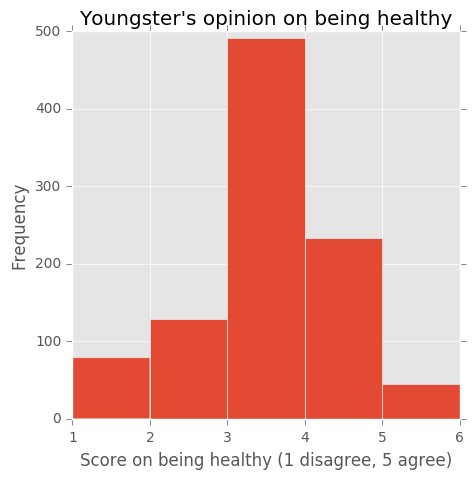

In [106]:
health_an.hist(column='Healthy eating', bins=np.arange(1, 7, 1),figsize = (5,5))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s opinion on being healthy')
plt.show()

Surprisingly most of the survey correspondents were not as concerned with health and lifestyle choices and we would have expected. Because more than half off the results had an opinion of ‘3’ or moderate concern over health. This led our group to analyze whether student’s opinion on health and their own personal health scores had any sort of relationship. In the figure below,  the main area of interest were people that were worried about health (scores 3-5) and not worried about health (scores 1-2). It is hypothesized that those that have little concern over health would have worse health. There is some ambiguity in the overall results of this test, but it looks like those that did not worry about health tended to have lower health.  

Using the 'Life Health' column we created that scores the youngster's health according to their smoking and drinking habits, we will create a boxplot that compares how much the youngster worries about their health vs what we think their health habits are.

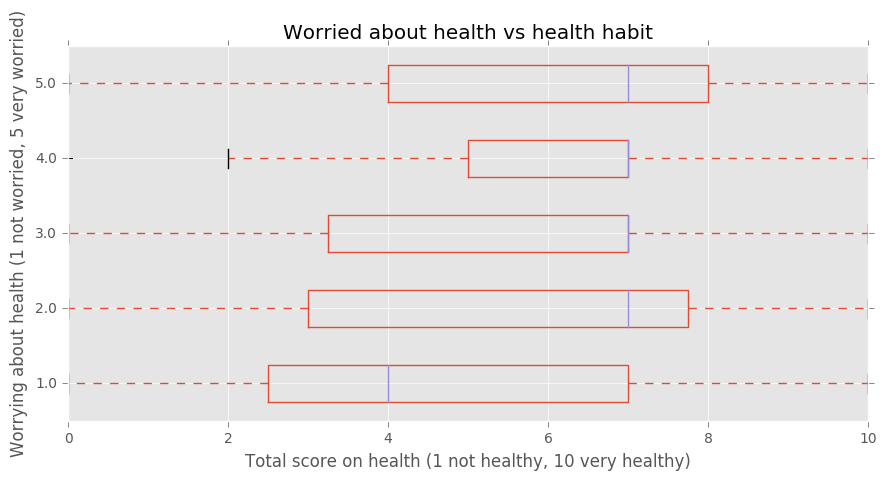

In [107]:
health_an.boxplot(column='Life health', by='Health', vert=False,figsize = (10,5))
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Worrying about health (1 not worried, 5 very worried)')
plt.title('Worried about health vs health habit')
plt.suptitle('')
plt.show()

According to the Center for Disease Control and Prevention, the Tobacco industry spends billions of dollars a year towards marketing and has continued to see a steady rate of cigarette purchases around the globe. The percentage of Slovakian children abusing tobacco is 23.2% for males and 23% for females. This is particularly alarming because this percentage is higher in than the average percentage of children smoking in high-income countries. 

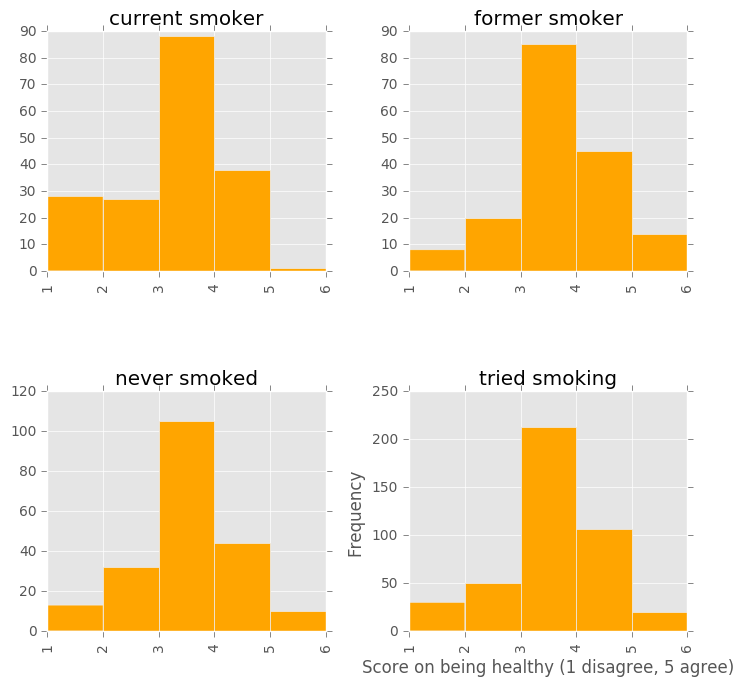

In [108]:
plt.rcParams['figure.figsize'] = (8,8)
health_an.hist(column='Healthy eating', by='Smoking', color = 'orange', bins=np.arange(1, 7, 1))
plt.ylim((0,250))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.show()

The first observation is that the largest group is the one where people said they had tried smoking. And similar to the combined data, all of the groups felt that they had moderate health levels of 3. However, it is important to note that for current smokers, none of them believed that they were very healthy (score of 5). Because the data could be split into two groups of smokers vs non-smokers, further research into the spending habits and personality traits of these groups was needed.

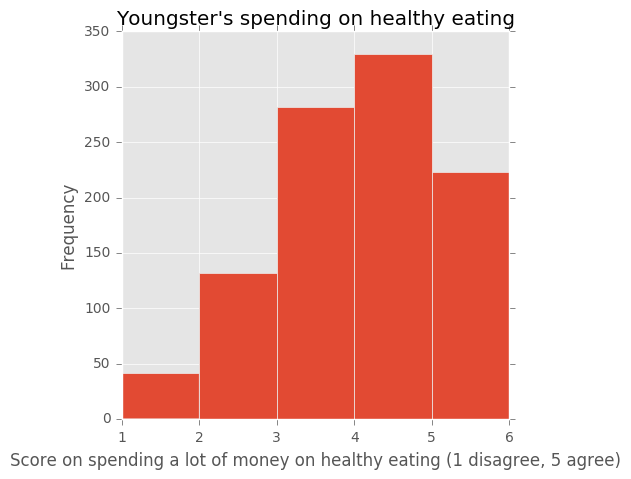

In [109]:
y_data.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on healthy eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on healthy eating')
plt.show()

Young people’s spending habits on food was particularly interesting because food expenses are a major portion of people’s expenses. From the USDA, it was reported that in 2013 around 10% of people’s per capita disposable income was spent on food away from home or food at home. According to the figure above, it appears that this demographic is willing to spend money for healthier foods. Slightly more than 50% of the survey participants indicated they were willing to spend money on healthier types of food. 

Next, we want to look at smoker's interest in active sports. We will categorize smokers are someone who is a former smoker or current smoker and subset them

In [110]:
smokers = health_an[health_an['Smoking'].str.contains('smoker', na = False)][['Alcohol', 'Spending on healthy eating', 'Passive sport', 'Active sport']]

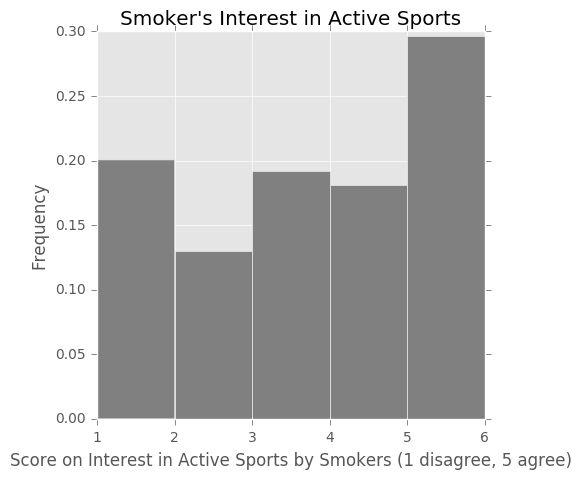

In [111]:
smokers.hist(column='Active sport', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Grey',normed = 1)
plt.xlabel('Score on Interest in Active Sports by Smokers (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Smoker\'s Interest in Active Sports')
plt.show()

From this we see that smoker’s personal interests are in athletic events. Surprisingly, major interest in sports was the response with the highest frequency. Nearly 50% of the respondents indicated an interest level of 4 or 5. This just goes to show that regardless of their personal choices, sports are an important component of their day. 

<h3> Health Interpertation </h3>

Next, we want to look at youngsters who we categorized as living a healthy life style, according to the 'Life health' Column we created based on their smoking and drinking habits. We will create a subset of these healthier youngsters.

In [112]:
health_sport = health_an[health_an['Life health'] > 6][['Passive sport','Spending on healthy eating', 'Active sport', 'Adrenaline sports']]

We will create a histogram that takes a look at this subsets and how willing are these healthier youngsters willing to spend on healthy eating.

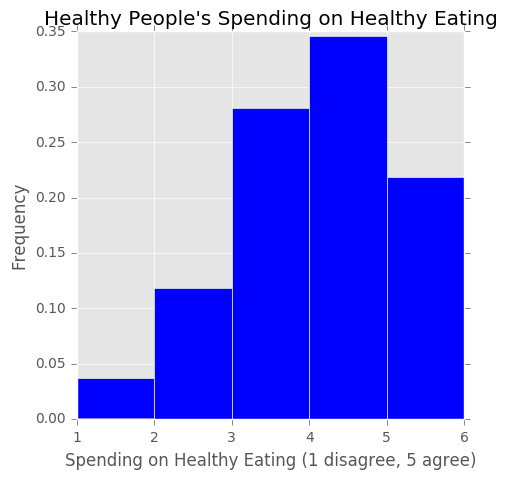

In [ ]:
health_sport.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Blue',normed=1)
plt.xlabel('Spending on Healthy Eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Healthy People\'s Spending on Healthy Eating')
plt.show()

Since the target demographic is willing to spend their income on healthier foods, there is a demand for these products. From the figures below, one can see that the willingness to spend on healthy food (scores 4 or 5) are higher for healthy people compared to smoker’s.  

In [ ]:
smokers.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Grey',normed = 1)
plt.xlabel('Spending on Healthy Eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Smoker\'s Spending on Healthy Eating')
plt.show()

Now with this information, a business can gear advertisements towards this demographic of people. High quality grocery stores such as Whole Food could promote their products n fitness centers or athletic sporting events. This is beneficial since we learned above that the age demographic spends a large portion of their income towards food expenditures. 

While tobacco is a very controversial industry, these businesses can use the cultural information to make better advertising decision. They can spend more money towards advertising in popular Slovakian sports such as Soccer and Ice hockey. The promotion of tobacco through sports may seem counter intuitive, but the widespread cultural popularity of athletic competition may be too profitable to pass on. 